 **Mount Google Drive**

```
# This is formatted as code
```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# Reading Carseats Dataset
data = pd.read_csv('./locationOf/Carseats.csv')

In [ ]:
# Showing the first 5 rows of dataset
data.head(5)
#data.iloc[[1,4,6,0]]

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
# Dropped column 1(Representing serial number)
# data = data.drop(column=['Unnamed'],axis=0)
# data.head(10)

In [ ]:
# Showing predictor types
data.dtypes

Unnamed: 0       int64
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

# Exploratory Data Analysis

In [ ]:
#Statstical Features of Data
data.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
# Checking the row names with NaN values.
data.isnull().sum(axis=0)

Unnamed: 0     0
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
#checking the size od data
data.shape

(400, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [ ]:
%matplotlib inline

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>]], dtype=object)

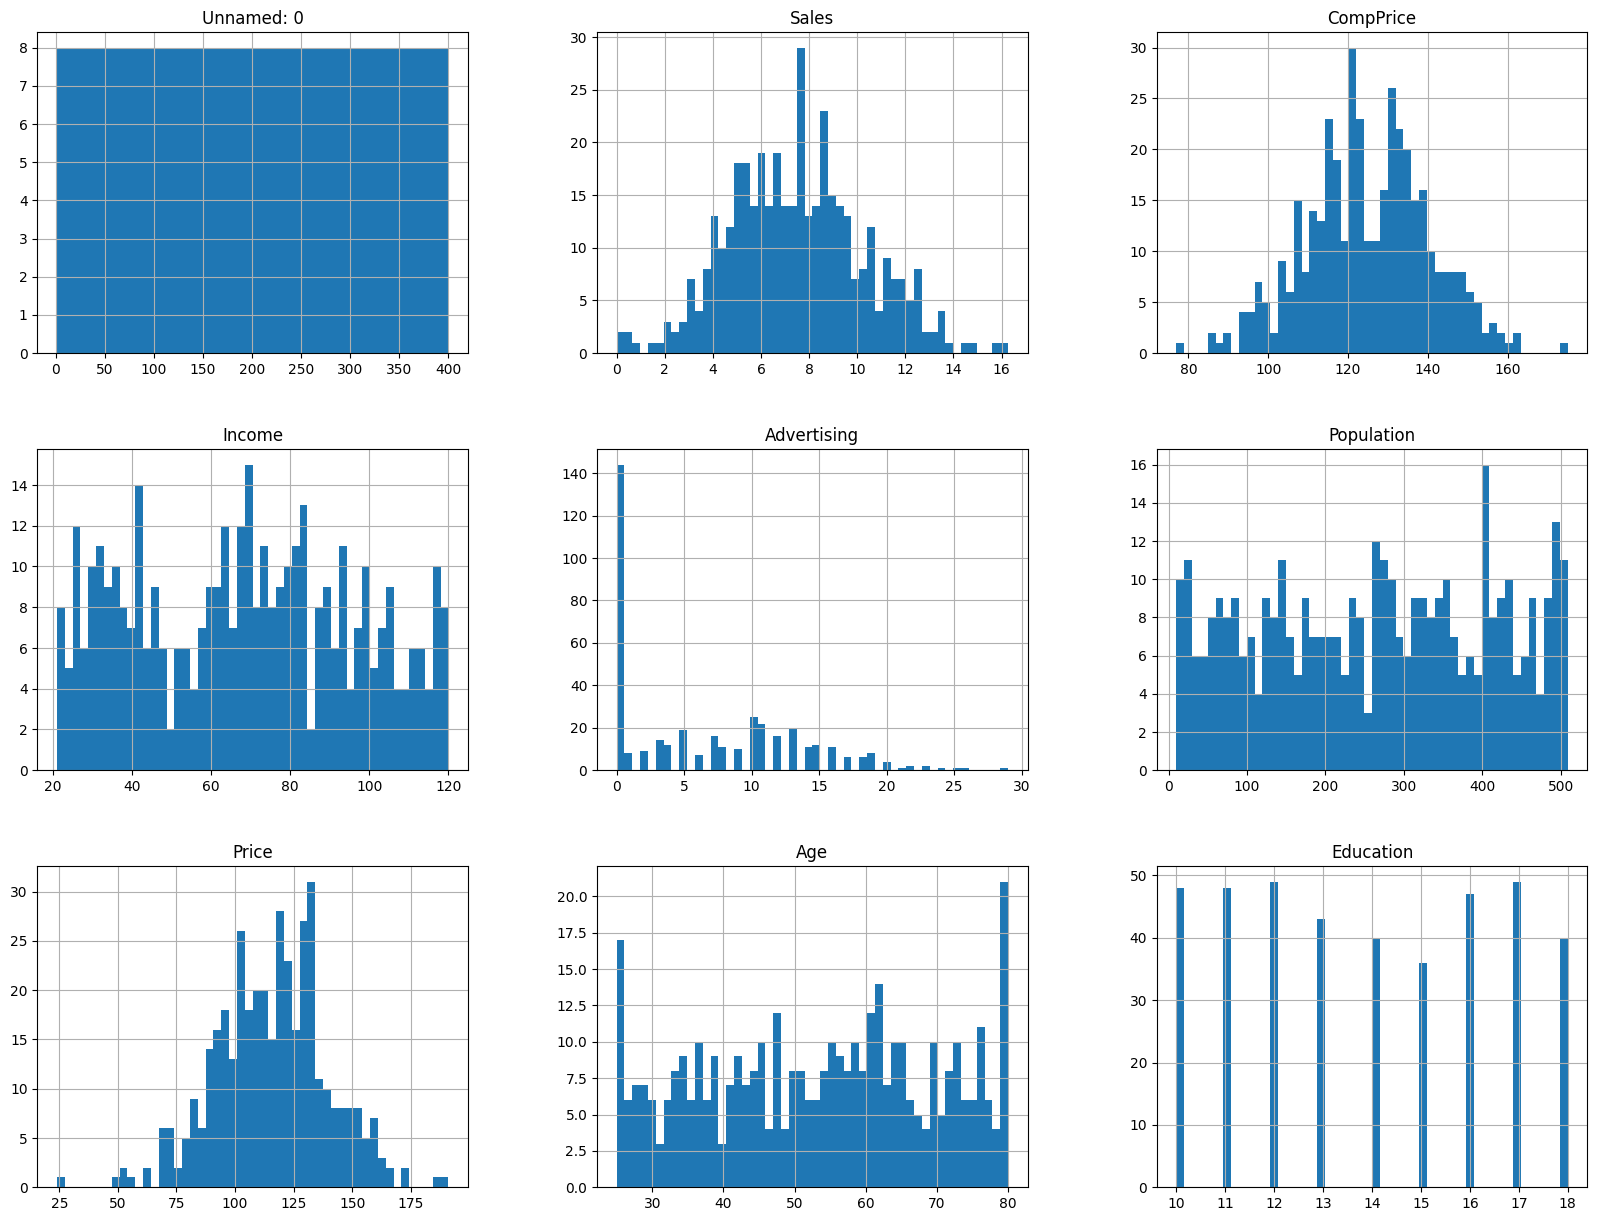

In [ ]:
data.hist(bins = 50 , figsize = (20,15))

<ipython-input-14-d8db31bab017>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

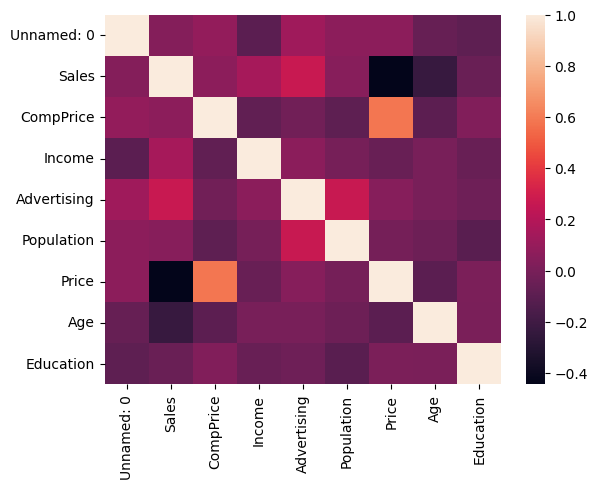

In [ ]:
import seaborn as sns
# colleration between attributes in form of heat maps
sns.heatmap(data.corr())

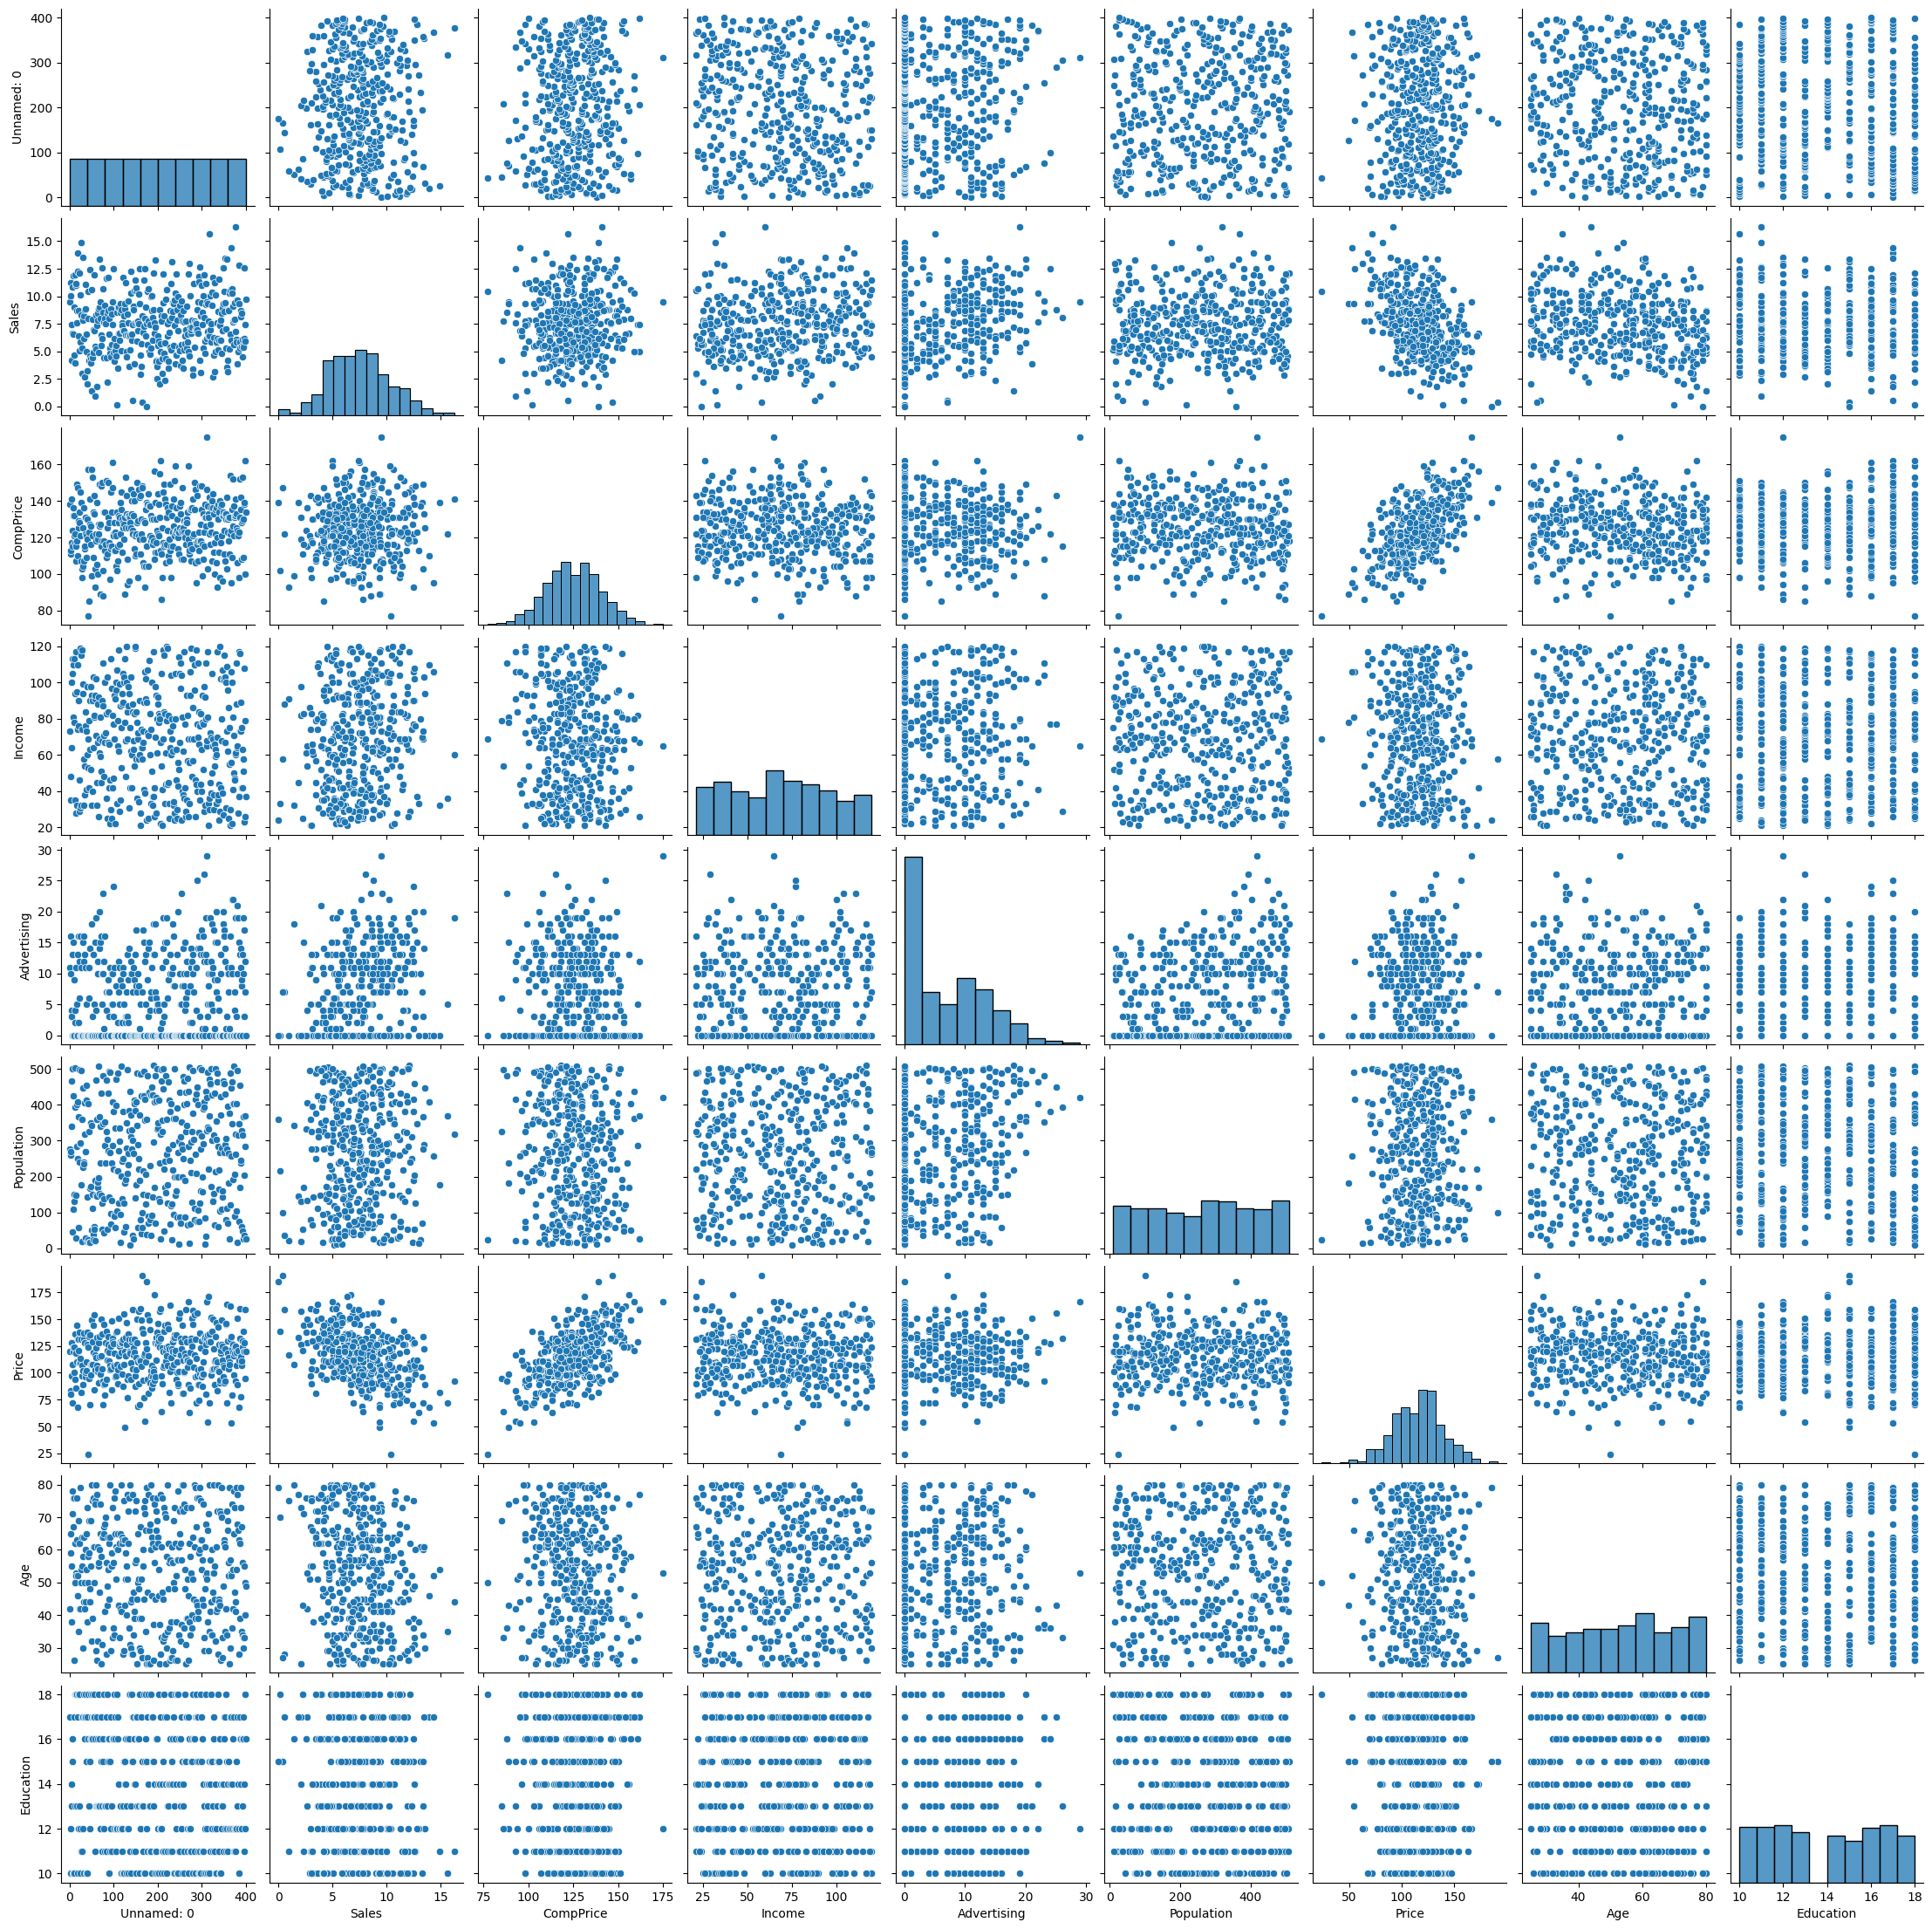

In [ ]:
# Pairplot between all pair of attribute in dataset
sns.pairplot(data)

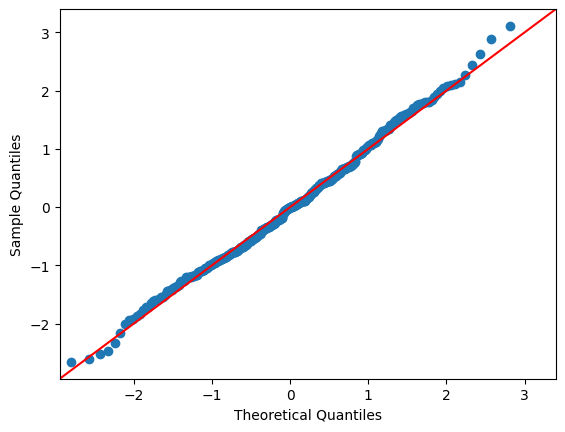

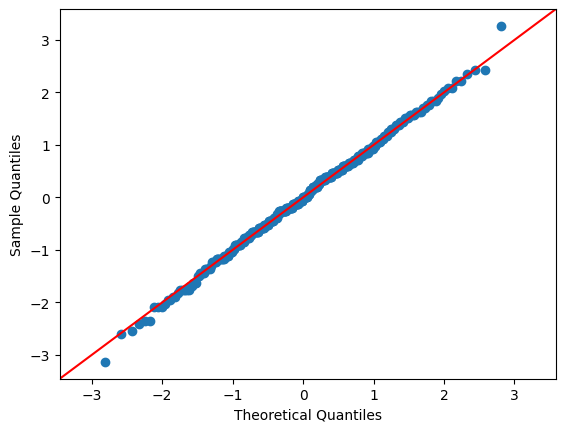

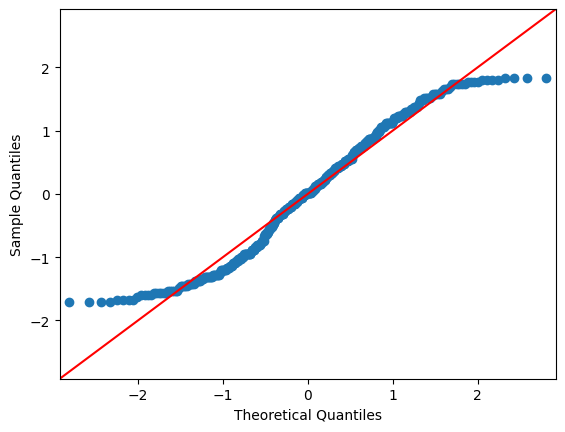

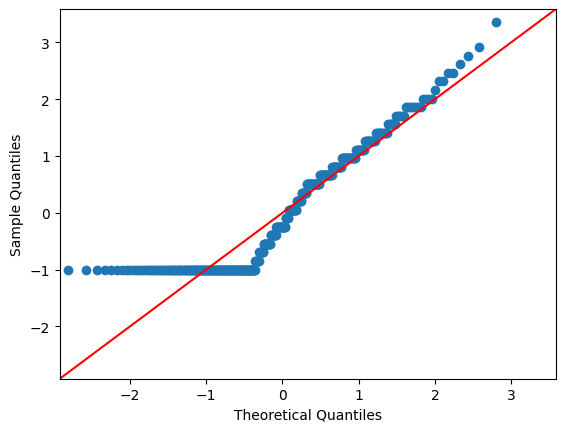

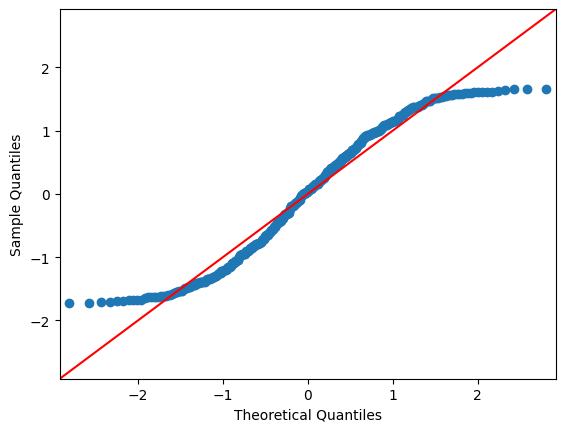

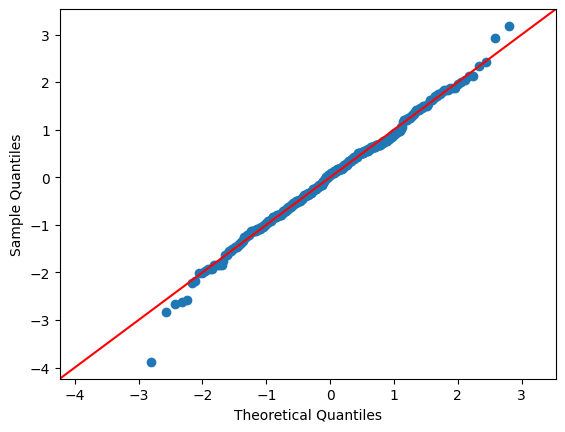

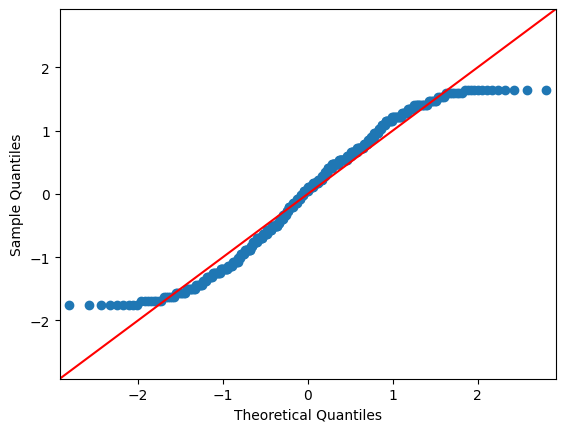

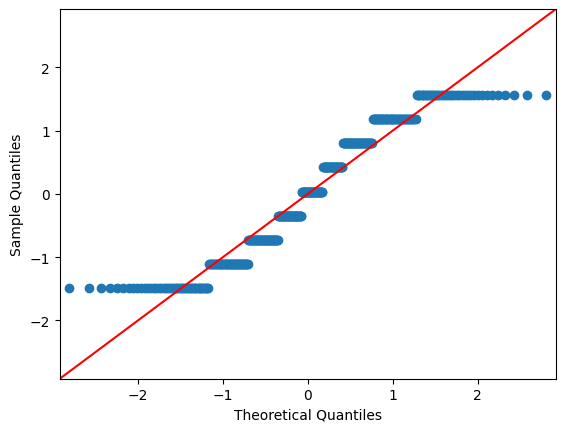

In [ ]:
import statsmodels.api as sm
import pylab as py
# qqplots to see attributes distribution

# Sales
sm.qqplot(data.Sales.values, fit=True, line='45')
py.show()

# CompPrice
sm.qqplot(data.CompPrice.values, fit=True, line='45')
py.show()

# Income
sm.qqplot(data.Income.values, fit=True, line='45')
py.show()

# Advertising
sm.qqplot(data.Advertising.values, fit=True, line='45')
py.show()

# Population
sm.qqplot(data.Population.values, fit=True, line='45')
py.show()

# Price
sm.qqplot(data.Price.values, fit=True, line='45')
py.show()

# Age
sm.qqplot(data.Age.values, fit=True, line='45')
py.show()

# Education
sm.qqplot(data.Education.values, fit=True, line='45')
py.show()

# Multiple Linear Regression

In [ ]:
# Given Data, Sales attribute to be predicted, other attributes are predictors.
data

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
